In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator


In [130]:
cluster_df = pd.read_csv('./data/cluster_Data.csv')

In [131]:
cluster_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


#### Find optimal number of clusters through elbow method

In [132]:
intertia = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cluster_df)
    intertia.append(kmeans.inertia_)
    

In [133]:
X = (range(1, len(intertia) + 1))
y = intertia
kn = KneeLocator(X, y, curve='convex', direction='decreasing')

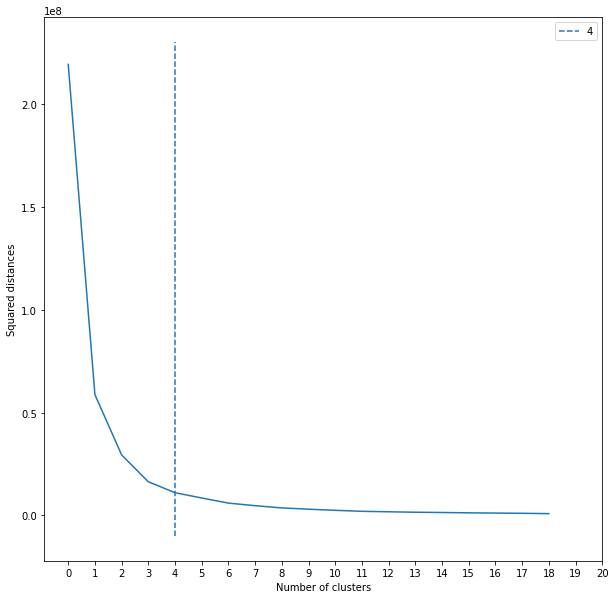

In [134]:
plt.figure(figsize=(10, 10))
plt.plot(range(len(intertia)), intertia)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', label=kn.knee)
plt.xlabel('Number of clusters')
plt.ylabel('Squared distances')
plt.legend()
plt.xticks(np.arange(0, 21))
plt.show()

In [135]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_df)

In [152]:
cluster_df['y_kmean'] = y_kmeans 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,y_kmean
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,2
3,36.7,19.3,193.0,3450.0,2
4,39.3,20.6,190.0,3650.0,0


In [153]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: range indices must be integers or slices, not tuple

TypeError: only integer scalar arrays can be converted to a scalar index